## Analysis of Survey Data for AI vs. Human-Generated Messages

Describe ...


#### Load Modules

In [48]:
import sys, os
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style("ticks")


#### Load and inspect data

In [49]:
df = pd.read_csv('../../data/uae_survey_cleaned_reversed_reduced_avg.csv')
df.head(3)

,Duration (in seconds),Exlcude_Speed,Finished,clarity_ai_mw_01_1,clarity_ai_mw_02_1,clarity_ai_mw_03_1,clarity_ai_mw_04_1,clarity_ai_mw_05_1,clarity_ai_wd_01_1,clarity_ai_wd_02_1,...,nationality,work,car_driving,religion,marital,education_years,income,women_driver_status,migrant_worker_status,young_driver_status
0,472,1,1,5,4,4,3,4,4,4,...,uae,job,1.0,muslim,single,4.0,125000.0,1,0,0
1,413,1,1,4,3,3,1,3,5,4,...,uae,student,4.0,muslim,single,1.0,65000.0,1,0,1
2,669,1,1,4,3,5,1,4,3,4,...,saudi,NaN,6.0,muslim,single,3.0,30000.0,0,1,0


In [50]:
df = pd.read_csv('../../data/uae_survey_cleaned_reversed_reduced_avg_fatalism_scales.csv')
df.head(3)

,Duration (in seconds),Exlcude_Speed,Finished,clarity_ai_mw_01_1,clarity_ai_mw_02_1,clarity_ai_mw_03_1,clarity_ai_mw_04_1,clarity_ai_mw_05_1,clarity_ai_wd_01_1,clarity_ai_wd_02_1,...,nationality,work,car_driving,religion,marital,education_years,income,women_driver_status,migrant_worker_status,young_driver_status
0,472,1,1,5,4,4,3,4,4,4,...,uae,job,1.0,muslim,single,4.0,125000.0,1,0,0
1,413,1,1,4,3,3,1,3,5,4,...,uae,student,4.0,muslim,single,1.0,65000.0,1,0,1
2,669,1,1,4,3,5,1,4,3,4,...,saudi,NaN,6.0,muslim,single,3.0,30000.0,0,1,0


In [51]:
df.describe()


,Duration (in seconds),Exlcude_Speed,Finished,clarity_ai_mw_01_1,clarity_ai_mw_02_1,clarity_ai_mw_03_1,clarity_ai_mw_04_1,clarity_ai_mw_05_1,clarity_ai_wd_01_1,clarity_ai_wd_02_1,...,age,gender_1man_2woman,english_first_language_0no_1yes,time_in_uae(1alllife|2=0-3yrs|3=4-7yrs|9morethan8years),car_driving,education_years,income,women_driver_status,migrant_worker_status,young_driver_status
count,117.000000,117.0,117.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,94.000000,115.000000,117.000000,116.000000,105.000000,114.000000,110.000000,117.000000,117.000000,117.000000
mean,867.538462,1.0,1.0,4.145299,3.897436,4.059829,3.786325,3.854701,3.837607,3.854701,...,22.500000,1.765217,0.119658,2.034483,-13.050476,2.877193,52772.727273,0.512821,0.256410,0.427350
std,476.900979,0.0,0.0,1.219560,1.199027,1.191135,1.325018,1.240585,1.338793,1.378811,...,5.237889,0.445847,0.325957,2.512338,39.518447,1.785588,43386.392635,0.501985,0.438529,0.496822
min,300.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,18.000000,1.000000,0.000000,1.000000,-99.000000,0.000000,10000.000000,0.000000,0.000000,0.000000
25%,547.000000,1.0,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,19.000000,2.000000,0.000000,1.000000,1.000000,1.250000,30000.000000,0.000000,0.000000,0.000000
50%,763.000000,1.0,1.0,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,20.500000,2.000000,0.000000,1.000000,2.000000,3.000000,30000.000000,1.000000,0.000000,0.000000
75%,1043.000000,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,23.000000,2.000000,0.000000,1.000000,5.000000,4.000000,65000.000000,1.000000,1.000000,1.000000
max,3428.000000,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,49.000000,3.000000,1.000000,9.000000,22.000000,6.000000,150000.000000,1.000000,1.000000,1.000000


#### Prepare pivoted dataframe

In [52]:
df_clarity_hum_mw             = pd.DataFrame()
df_clarity_hum_mw['rating']   = df.filter(regex = 'clarity_hum_mw',axis=1).mean().values
df_clarity_hum_mw['type']     = 'Human'
df_clarity_hum_mw['audience'] = 'Migrant Workers'
df_clarity_hum_mw['question'] = 'Clarity'

df_clarity_hum_wd             = pd.DataFrame()
df_clarity_hum_wd['rating']   = df.filter(regex = 'clarity_hum_wd',axis=1).mean().values
df_clarity_hum_wd['type']     = 'Human'
df_clarity_hum_wd['audience'] = 'Women Drivers'
df_clarity_hum_wd['question'] = 'Clarity'

df_clarity_hum_yd             = pd.DataFrame()
df_clarity_hum_yd['rating']   = df.filter(regex = 'clarity_hum_yd',axis=1).mean().values
df_clarity_hum_yd['type']     = 'Human'
df_clarity_hum_yd['audience'] = 'Young Drivers'
df_clarity_hum_yd['question'] = 'Clarity'

df_clarity_ai_mw             = pd.DataFrame()
df_clarity_ai_mw['rating']   = df.filter(regex = 'clarity_ai_mw',axis=1).mean().values
df_clarity_ai_mw['type']     = 'AI'
df_clarity_ai_mw['audience'] = 'Migrant Workers'
df_clarity_ai_mw['question'] = 'Clarity'

df_clarity_ai_wd             = pd.DataFrame()
df_clarity_ai_wd['rating']   = df.filter(regex = 'clarity_ai_wd',axis=1).mean().values
df_clarity_ai_wd['type']     = 'AI'
df_clarity_ai_wd['audience'] = 'Women Drivers'
df_clarity_ai_wd['question'] = 'Clarity'

df_clarity_ai_yd             = pd.DataFrame()
df_clarity_ai_yd['rating']   = df.filter(regex = 'clarity_ai_yd',axis=1).mean().values
df_clarity_ai_yd['type']     = 'AI'
df_clarity_ai_yd['audience'] = 'Young Drivers'
df_clarity_ai_yd['question'] = 'Clarity'

df_quality_hum_mw             = pd.DataFrame()
df_quality_hum_mw['rating']   = df.filter(regex = 'quality_hum_mw',axis=1).mean().values
df_quality_hum_mw['type']     = 'Human'
df_quality_hum_mw['audience'] = 'Migrant Workers'
df_quality_hum_mw['question'] = 'Quality'

df_quality_hum_wd             = pd.DataFrame()
df_quality_hum_wd['rating']   = df.filter(regex = 'quality_hum_wd',axis=1).mean().values
df_quality_hum_wd['type']     = 'Human'
df_quality_hum_wd['audience'] = 'Women Drivers'
df_quality_hum_wd['question'] = 'Quality'

df_quality_hum_yd             = pd.DataFrame()
df_quality_hum_yd['rating']   = df.filter(regex = 'quality_hum_yd',axis=1).mean().values
df_quality_hum_yd['type']     = 'Human'
df_quality_hum_yd['audience'] = 'Young Drivers'
df_quality_hum_yd['question'] = 'Quality'

df_quality_ai_mw             = pd.DataFrame()
df_quality_ai_mw['rating']   = df.filter(regex = 'quality_ai_mw',axis=1).mean().values
df_quality_ai_mw['type']     = 'AI'
df_quality_ai_mw['audience'] = 'Migrant Workers'
df_quality_ai_mw['question'] = 'Quality'

df_quality_ai_wd             = pd.DataFrame()
df_quality_ai_wd['rating']   = df.filter(regex = 'quality_ai_wd',axis=1).mean().values
df_quality_ai_wd['type']     = 'AI'
df_quality_ai_wd['audience'] = 'Women Drivers'
df_quality_ai_wd['question'] = 'Quality'

df_quality_ai_yd             = pd.DataFrame()
df_quality_ai_yd['rating']   = df.filter(regex = 'quality_ai_yd',axis=1).mean().values
df_quality_ai_yd['type']     = 'AI'
df_quality_ai_yd['audience'] = 'Young Drivers'
df_quality_ai_yd['question'] = 'Quality'

In [53]:
df_all = pd.concat([df_clarity_hum_mw, df_clarity_hum_wd, df_clarity_hum_yd, df_clarity_ai_mw, df_clarity_ai_wd, df_clarity_ai_yd,
                    df_quality_hum_mw, df_quality_hum_wd, df_quality_hum_yd, df_quality_ai_mw, df_quality_ai_wd, df_quality_ai_yd ], ignore_index = True)
df_all.to_csv('../../data/df_all.csv')
df_all.head()

,rating,type,audience,question
0,4.495726,Human,Migrant Workers,Clarity
1,4.230769,Human,Migrant Workers,Clarity
2,3.871795,Human,Migrant Workers,Clarity
3,4.213675,Human,Migrant Workers,Clarity
4,4.350427,Human,Migrant Workers,Clarity


In [54]:
df_all.groupby(['type','question']).mean(['rating'])

rating
type  question          
AI    Clarity   3.828490
      Quality   3.962393
Human Clarity   4.113390
      Quality   4.071795

In [55]:
df_all.groupby(['type','question']).std(ddof = 1, numeric_only = True)

rating
type  question          
AI    Clarity   0.149807
      Quality   0.164462
Human Clarity   0.316082
      Quality   0.345702

#### Plot Swarm/Violinplot: AI vs. Human (all messages, clarity and quality ratings)

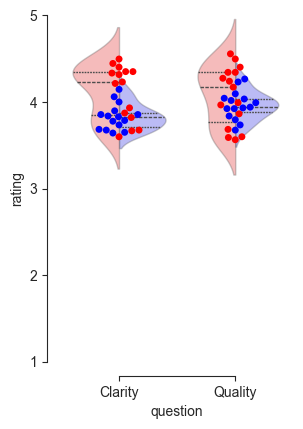

In [56]:
plt.figure(figsize = (3.,4.5))

ax = sns.violinplot(data=df_all, x="question", y="rating", hue="type", 
                    split=True, inner="quart", linewidth=1, palette={"Human": "r", "AI": "b"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]):
    violin.set_alpha(alpha)

sns.swarmplot(data=df_all, x="question", y="rating", hue="type",
              palette={"Human": "r", "AI": "b"});

#plt.legend(bbox_to_anchor=(1.0, 1), borderaxespad=0);
#plt.legend(loc = 3);
plt.legend([],[], frameon=False)
plt.ylim(1,5);
plt.yticks(np.arange(1,6))
sns.despine(offset= 10, trim=True);


#### Plot Message Evaluations by Conditions 
(AI vs. Human) & (separated by intended audience: for migrant workers, women drivers, young drivers)

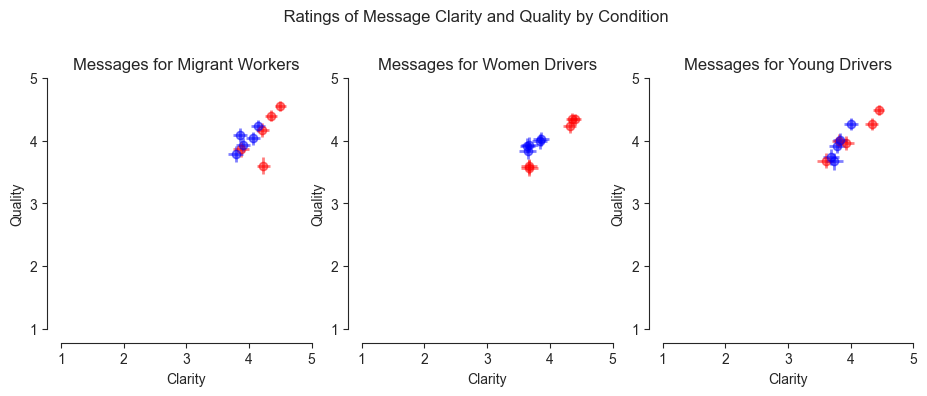

In [57]:
fig = plt.figure(figsize = (11,4))
plt.suptitle(" Ratings of Message Clarity and Quality by Condition")

ax1 = fig.add_subplot(131)
ax1.title.set_text('Messages for Migrant Workers')
plt.errorbar( y = df.filter(regex = 'quality_hum_mw',axis=1).mean().values,  
              x = df.filter(regex = 'clarity_hum_mw',axis=1).mean().values,
              yerr = df.filter(regex = 'quality_hum_mw',axis=1).std(axis=0)/np.sqrt(116), 
              xerr = df.filter(regex = 'clarity_hum_mw',axis=1).std(axis=0)/np.sqrt(116),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df.filter(regex = 'quality_ai_mw',axis=1).mean().values,  
              x = df.filter(regex = 'clarity_ai_mw',axis=1).mean().values,
              yerr = df.filter(regex = 'quality_ai_mw',axis=1).std(axis=0)/np.sqrt(116), 
              xerr = df.filter(regex = 'clarity_ai_mw',axis=1).std(axis=0)/np.sqrt(116),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 


ax2 = fig.add_subplot(132)
ax2.title.set_text('Messages for Women Drivers')
plt.errorbar( y = df.filter(regex = 'quality_hum_wd',axis=1).mean().values,  
              x = df.filter(regex = 'clarity_hum_wd',axis=1).mean().values,
              yerr = df.filter(regex = 'quality_hum_wd',axis=1).std(axis=0)/np.sqrt(116), 
              xerr = df.filter(regex = 'clarity_hum_wd',axis=1).std(axis=0)/np.sqrt(116),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df.filter(regex = 'quality_ai_wd',axis=1).mean().values,  
              x = df.filter(regex = 'clarity_ai_wd',axis=1).mean().values,
              yerr = df.filter(regex = 'quality_ai_wd',axis=1).std(axis=0)/np.sqrt(116), 
              xerr = df.filter(regex = 'clarity_ai_wd',axis=1).std(axis=0)/np.sqrt(116),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 


ax3 = fig.add_subplot(133)
ax3.title.set_text('Messages for Young Drivers')
plt.errorbar( y = df.filter(regex = 'quality_hum_yd',axis=1).mean().values,  
              x = df.filter(regex = 'clarity_hum_yd',axis=1).mean().values,
              yerr = df.filter(regex = 'quality_hum_yd',axis=1).std(axis=0)/np.sqrt(116), 
              xerr = df.filter(regex = 'clarity_hum_yd',axis=1).std(axis=0)/np.sqrt(116),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df.filter(regex = 'quality_ai_yd',axis=1).mean().values,  
              x = df.filter(regex = 'clarity_ai_yd',axis=1).mean().values,
              yerr = df.filter(regex = 'quality_ai_yd',axis=1).std(axis=0)/np.sqrt(116), 
              xerr = df.filter(regex = 'clarity_ai_yd',axis=1).std(axis=0)/np.sqrt(116),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 

sns.despine(offset=10, trim=True);

### Analysis of Audience Matching

#### First, the stats

In [58]:
to_evaluate = [['clarity_hum_mw','clarity_ai_mw', 'quality_hum_mw','quality_ai_mw'],
               ['clarity_hum_wd','clarity_ai_wd', 'quality_hum_wd','quality_ai_wd'],
               ['clarity_hum_yd','clarity_ai_yd', 'quality_hum_yd','quality_ai_yd']]

group_variable = ['migrant_worker_status',
                  'women_driver_status',
                  'young_driver_status']


def run_ttest(to_evaluate_variable, grouping_variable):
    values = df.filter(regex  = to_evaluate_variable,axis=1).mean(axis=1).values
    values_target_audience    =  values[df[grouping_variable].values == 1]
    values_nontarget_audience =  values[df[grouping_variable].values == 0]
    (t, p) = scipy.stats.ttest_ind(values_target_audience, values_nontarget_audience, alternative = 'greater')
    return to_evaluate_variable + ' by ' +  grouping_variable + ': t-value = ' + str(round(t, 2)) + ', p = ' + str(round(p, 2))


for current_group_index in range(3):
    for current_evaluation_index in range(4):
        print(run_ttest(to_evaluate[current_group_index][current_evaluation_index], group_variable[current_group_index]))
    print(' ')

clarity_hum_mw by migrant_worker_status: t-value = -2.01, p = 0.98
clarity_ai_mw by migrant_worker_status: t-value = -1.76, p = 0.96
quality_hum_mw by migrant_worker_status: t-value = -1.2, p = 0.88
quality_ai_mw by migrant_worker_status: t-value = -0.71, p = 0.76
 
clarity_hum_wd by women_driver_status: t-value = 0.1, p = 0.46
clarity_ai_wd by women_driver_status: t-value = -0.31, p = 0.62
quality_hum_wd by women_driver_status: t-value = -1.18, p = 0.88
quality_ai_wd by women_driver_status: t-value = -0.92, p = 0.82
 
clarity_hum_yd by young_driver_status: t-value = 0.52, p = 0.3
clarity_ai_yd by young_driver_status: t-value = 0.8, p = 0.21
quality_hum_yd by young_driver_status: t-value = 1.58, p = 0.06
quality_ai_yd by young_driver_status: t-value = 1.06, p = 0.15
 


#### Second, plotting everything

Migrant Workers:
30 matching &  87 nonmatching target
Women Drivers:
60 matching &  57 nonmatching target
Young Drivers:
50 matching &  67 nonmatching target


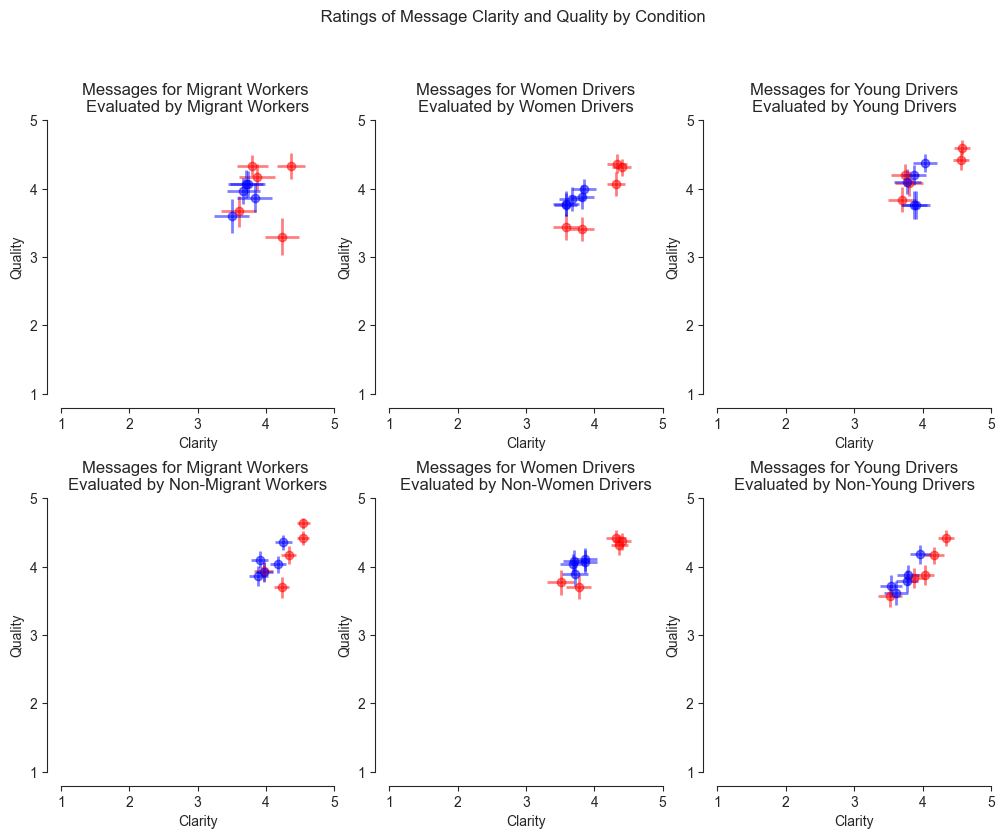

In [59]:
fig = plt.figure(figsize = (12, 9))
plt.suptitle(" Ratings of Message Clarity and Quality by Condition")

# Migrant worker messages
print('Migrant Workers:')
df_target = df[df['migrant_worker_status'] == 1]
df_nontarget = df[df['migrant_worker_status'] == 0]
print( str(len(df_target)) + ' matching &  ' + str(len(df_nontarget))  + ' nonmatching target')

# target audience
ax1 = fig.add_subplot(231)
ax1.title.set_text('Messages for Migrant Workers \nEvaluated by Migrant Workers')
plt.errorbar( y = df_target.filter(regex = 'quality_hum_mw',axis=1).mean().values,  
              x = df_target.filter(regex = 'clarity_hum_mw',axis=1).mean().values,
              yerr = df_target.filter(regex = 'quality_hum_mw',axis=1).std(axis=0)/np.sqrt(len(df_target)), 
              xerr = df_target.filter(regex = 'clarity_hum_mw',axis=1).std(axis=0)/np.sqrt(len(df_target)),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df_target.filter(regex = 'quality_ai_mw',axis=1).mean().values,  
              x = df_target.filter(regex = 'clarity_ai_mw',axis=1).mean().values,
              yerr = df_target.filter(regex = 'quality_ai_mw',axis=1).std(axis=0)/np.sqrt(len(df_target)), 
              xerr = df_target.filter(regex = 'clarity_ai_mw',axis=1).std(axis=0)/np.sqrt(len(df_target)),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 

# nontarget audience
ax4 = fig.add_subplot(234)
ax4.title.set_text('Messages for Migrant Workers \nEvaluated by Non-Migrant Workers')
plt.errorbar( y = df_nontarget.filter(regex = 'quality_hum_mw',axis=1).mean().values,  
              x = df_nontarget.filter(regex = 'clarity_hum_mw',axis=1).mean().values,
              yerr = df_nontarget.filter(regex = 'quality_hum_mw',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)), 
              xerr = df_nontarget.filter(regex = 'clarity_hum_mw',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df_nontarget.filter(regex = 'quality_ai_mw',axis=1).mean().values,  
              x = df_nontarget.filter(regex = 'clarity_ai_mw',axis=1).mean().values,
              yerr = df_nontarget.filter(regex = 'quality_ai_mw',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)), 
              xerr = df_nontarget.filter(regex = 'clarity_ai_mw',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 


# Women driver messages
print('Women Drivers:')
df_target = df[df['women_driver_status'] == 1]
df_nontarget = df[df['women_driver_status'] == 0]
print( str(len(df_target)) + ' matching &  ' + str(len(df_nontarget))  + ' nonmatching target')

# target audience
ax2 = fig.add_subplot(232)
ax2.title.set_text('Messages for Women Drivers\nEvaluated by Women Drivers')
plt.errorbar( y = df_target.filter(regex = 'quality_hum_wd',axis=1).mean().values,  
              x = df_target.filter(regex = 'clarity_hum_wd',axis=1).mean().values,
              yerr = df_target.filter(regex = 'quality_hum_wd',axis=1).std(axis=0)/np.sqrt(len(df_target)), 
              xerr = df_target.filter(regex = 'clarity_hum_wd',axis=1).std(axis=0)/np.sqrt(len(df_target)),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df_target.filter(regex = 'quality_ai_wd',axis=1).mean().values,  
              x = df_target.filter(regex = 'clarity_ai_wd',axis=1).mean().values,
              yerr = df_target.filter(regex = 'quality_ai_wd',axis=1).std(axis=0)/np.sqrt(len(df_target)), 
              xerr = df_target.filter(regex = 'clarity_ai_wd',axis=1).std(axis=0)/np.sqrt(len(df_target)),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 

#nontarget audience
ax5 = fig.add_subplot(235)
ax5.title.set_text('Messages for Women Drivers\nEvaluated by Non-Women Drivers')
plt.errorbar( y = df_nontarget.filter(regex = 'quality_hum_wd',axis=1).mean().values,  
              x = df_nontarget.filter(regex = 'clarity_hum_wd',axis=1).mean().values,
              yerr = df_nontarget.filter(regex = 'quality_hum_wd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)), 
              xerr = df_nontarget.filter(regex = 'clarity_hum_wd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df_nontarget.filter(regex = 'quality_ai_wd',axis=1).mean().values,  
              x = df_nontarget.filter(regex = 'clarity_ai_wd',axis=1).mean().values,
              yerr = df_nontarget.filter(regex = 'quality_ai_wd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)), 
              xerr = df_nontarget.filter(regex = 'clarity_ai_wd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 


# Young driver messages
print('Young Drivers:')
df_target = df[df['young_driver_status'] == 1]
df_nontarget = df[df['young_driver_status'] == 0]
print( str(len(df_target)) + ' matching &  ' + str(len(df_nontarget))  + ' nonmatching target')

# target audience
ax3 = fig.add_subplot(233)
ax3.title.set_text('Messages for Young Drivers\nEvaluated by Young Drivers')
plt.errorbar( y = df_target.filter(regex = 'quality_hum_yd',axis=1).mean().values,  
              x = df_target.filter(regex = 'clarity_hum_yd',axis=1).mean().values,
              yerr = df_target.filter(regex = 'quality_hum_yd',axis=1).std(axis=0)/np.sqrt(len(df_target)), 
              xerr = df_target.filter(regex = 'clarity_hum_yd',axis=1).std(axis=0)/np.sqrt(len(df_target)),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df_target.filter(regex = 'quality_ai_yd',axis=1).mean().values,  
              x = df_target.filter(regex = 'clarity_ai_yd',axis=1).mean().values,
              yerr = df_target.filter(regex = 'quality_ai_yd',axis=1).std(axis=0)/np.sqrt(len(df_target)), 
              xerr = df_target.filter(regex = 'clarity_ai_yd',axis=1).std(axis=0)/np.sqrt(len(df_target)),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 

# nontarget audience
ax6 = fig.add_subplot(236)
ax6.title.set_text('Messages for Young Drivers\nEvaluated by Non-Young Drivers')
plt.errorbar( y = df_nontarget.filter(regex = 'quality_hum_yd',axis=1).mean().values,  
              x = df_nontarget.filter(regex = 'clarity_hum_yd',axis=1).mean().values,
              yerr = df_nontarget.filter(regex = 'quality_hum_yd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)), 
              xerr = df_nontarget.filter(regex = 'clarity_hum_yd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)),
              c = 'r', linewidth = 0, fmt='o',
              ecolor='r', elinewidth=2, alpha = 0.5,  capsize=0 );

plt.errorbar( y = df_nontarget.filter(regex = 'quality_ai_yd',axis=1).mean().values,  
              x = df_nontarget.filter(regex = 'clarity_ai_yd',axis=1).mean().values,
              yerr = df_nontarget.filter(regex = 'quality_ai_yd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)), 
              xerr = df_nontarget.filter(regex = 'clarity_ai_yd',axis=1).std(axis=0)/np.sqrt(len(df_nontarget)),
              c = 'b', linewidth = 0, fmt='o',
              ecolor='b', elinewidth=2, alpha = 0.5,  capsize=0 );
plt.axis('square'); plt.ylim(1,5); plt.xlim(1,5); plt.xticks(np.arange(1,6)); plt.yticks(np.arange(1,6)); plt.xlabel('Clarity'); plt.ylabel('Quality'); 


sns.despine(offset=10, trim=True);

In [60]:
#'''
df_audience_themes = pd.DataFrame()

df_audience_themes['mw_hum_average_clarity']= df.filter(regex = 'clarity_hum_mw',axis=1).mean(axis=1)
df_audience_themes['mw_status'] = df['migrant_worker_status'].values

df_audience_themes['wd_hum_average_clarity']= df.filter(regex = 'clarity_hum_wd',axis=1).mean(axis=1)
df_audience_themes['wd_status'] = df['women_driver_status'].values

df_audience_themes['yd_hum_average_clarity']= df.filter(regex = 'clarity_hum_yd',axis=1).mean(axis=1)
df_audience_themes['yd_status'] = df['young_driver_status'].values

df_audience_themes.head()#'''

,mw_hum_average_clarity,mw_status,wd_hum_average_clarity,wd_status,yd_hum_average_clarity,yd_status
0,5.0,0,4.6,1,4.6,0
1,3.4,0,3.4,1,3.0,1
2,4.0,1,4.2,0,3.2,0
3,4.0,0,3.8,0,4.0,0
4,4.6,0,4.6,0,3.8,0


In [61]:
df

,Duration (in seconds),Exlcude_Speed,Finished,clarity_ai_mw_01_1,clarity_ai_mw_02_1,clarity_ai_mw_03_1,clarity_ai_mw_04_1,clarity_ai_mw_05_1,clarity_ai_wd_01_1,clarity_ai_wd_02_1,...,nationality,work,car_driving,religion,marital,education_years,income,women_driver_status,migrant_worker_status,young_driver_status
0,472,1,1,5,4,4,3,4,4,4,...,uae,job,1.0,muslim,single,4.0,125000.0,1,0,0
1,413,1,1,4,3,3,1,3,5,4,...,uae,student,4.0,muslim,single,1.0,65000.0,1,0,1
2,669,1,1,4,3,5,1,4,3,4,...,saudi,NaN,6.0,muslim,single,3.0,30000.0,0,1,0
3,811,1,1,4,3,3,4,4,3,4,...,egyptian,student,-99.0,muslim,single,2.0,20000.0,0,0,0
4,763,1,1,4,1,3,4,2,4,2,...,jordanian,student,-99.0,muslim,single,1.0,65000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,696,1,1,5,3,3,3,2,2,3,...,uae,job,3.0,muslim,single,3.0,10000.0,1,0,0
113,801,1,1,4,3,4,3,4,3,4,...,uae,student,-99.0,muslim,single,2.0,NaN,0,0,0
114,312,1,1,3,5,5,4,4,5,5,...,uae,NaN,1.0,muslim,single,1.0,65000.0,1,0,1
115,580,1,1,5,5,5,5,5,5,5,...,uae,NaN,4.0,muslim,single,3.0,10000.0,0,0,0



### reshape DF and prepare for analysis by subjects, items


In [62]:
def convert_to_sub_pattern(num):
    return f'sub{str(num + 1).zfill(3)}'

In [69]:
# quality first
sub_df = df.filter(regex = 'quali',axis=1)
sub_df.reset_index(inplace=True)
sub_df = sub_df.rename(columns={'index': 'index_col'}).copy()
sub_df['sub_index'] = sub_df['index_col'].map(convert_to_sub_pattern)
sub_df = sub_df.drop('index_col', axis=1)

melted_df = pd.melt(sub_df, id_vars=['sub_index'], var_name='all_messages', value_name='message_evaluation')
sorted_melted_df = melted_df.sort_values(by='sub_index') 

sorted_melted_df['source'] = 'No'  # Initialize with default value
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_ai_'), 'source'] = 'AI'
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_hum_'), 'source'] = 'Human'

sorted_melted_df['theme'] = 'No'  
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_mw_'), 'theme'] = 'Migrant Workers'
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_wd_'), 'theme'] = 'Women Drivers'
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_yd_'), 'theme'] = 'Young Drivers'

sorted_melted_df = sorted_melted_df.sort_values(by=['sub_index', 'all_messages'], ascending=[True, True])
desired_order = ['sub_index', 'source', 'theme', 'all_messages', 'message_evaluation']  # Specify the desired column order
sorted_melted_df = sorted_melted_df[desired_order]
sorted_melted_df.reset_index(inplace=True)

fatal_df = df.filter(regex = 'Fatal',axis=1)
fatal_df.reset_index(inplace=True)
fatal_df = fatal_df.rename(columns={'index': 'index_col'}).copy()
fatal_df['sub_index'] = fatal_df['index_col'].map(convert_to_sub_pattern)
fatal_df = fatal_df.drop('index_col', axis=1)

fs_df = pd.merge(sorted_melted_df, fatal_df, on='sub_index')
fs_df.to_csv('../../data/melted_quality_fatal_df.csv', index = False)

fs_df.tail()

,index,sub_index,source,theme,all_messages,message_evaluation,Fatalism_DivineControl,Fatalism_Luck,Fatalism_Internality-R,Fatalism_General
3505,3041,sub117,Human,Young Drivers,quality_hum_yd_01_1,5,5.0,5.0,1.0,5.0
3506,3158,sub117,Human,Young Drivers,quality_hum_yd_02_1,5,5.0,5.0,1.0,5.0
3507,3275,sub117,Human,Young Drivers,quality_hum_yd_03_1,5,5.0,5.0,1.0,5.0
3508,3392,sub117,Human,Young Drivers,quality_hum_yd_04_1,5,5.0,5.0,1.0,5.0
3509,3509,sub117,Human,Young Drivers,quality_hum_yd_05_1,5,5.0,5.0,1.0,5.0


In [70]:
# clarity second
sub_df = df.filter(regex = 'clari',axis=1)
sub_df.reset_index(inplace=True)
sub_df = sub_df.rename(columns={'index': 'index_col'}).copy()
sub_df['sub_index'] = sub_df['index_col'].map(convert_to_sub_pattern)
sub_df = sub_df.drop('index_col', axis=1)

melted_df = pd.melt(sub_df, id_vars=['sub_index'], var_name='all_messages', value_name='message_evaluation')
sorted_melted_df = melted_df.sort_values(by='sub_index') 

sorted_melted_df['source'] = 'No'  # Initialize with default value
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_ai_'), 'source'] = 'AI'
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_hum_'), 'source'] = 'Human'

sorted_melted_df['theme'] = 'No'  
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_mw_'), 'theme'] = 'Migrant Workers'
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_wd_'), 'theme'] = 'Women Drivers'
sorted_melted_df.loc[sorted_melted_df['all_messages'].str.contains('_yd_'), 'theme'] = 'Young Drivers'

sorted_melted_df = sorted_melted_df.sort_values(by=['sub_index', 'all_messages'], ascending=[True, True])
desired_order = ['sub_index', 'source', 'theme', 'all_messages', 'message_evaluation']  # Specify the desired column order
sorted_melted_df = sorted_melted_df[desired_order]
sorted_melted_df.reset_index(inplace=True)

fatal_df = df.filter(regex = 'Fatal',axis=1)
fatal_df.reset_index(inplace=True)
fatal_df = fatal_df.rename(columns={'index': 'index_col'}).copy()
fatal_df['sub_index'] = fatal_df['index_col'].map(convert_to_sub_pattern)
fatal_df = fatal_df.drop('index_col', axis=1)

fs_df = pd.merge(sorted_melted_df, fatal_df, on='sub_index')
fs_df.to_csv('../../data/melted_clarity_fatal_df.csv', index = False)

fs_df.tail()

,index,sub_index,source,theme,all_messages,message_evaluation,Fatalism_DivineControl,Fatalism_Luck,Fatalism_Internality-R,Fatalism_General
3505,3041,sub117,Human,Young Drivers,clarity_hum_yd_01_1,5,5.0,5.0,1.0,5.0
3506,3158,sub117,Human,Young Drivers,clarity_hum_yd_02_1,5,5.0,5.0,1.0,5.0
3507,3275,sub117,Human,Young Drivers,clarity_hum_yd_03_1,5,5.0,5.0,1.0,5.0
3508,3392,sub117,Human,Young Drivers,clarity_hum_yd_04_1,5,5.0,5.0,1.0,5.0
3509,3509,sub117,Human,Young Drivers,clarity_hum_yd_05_1,5,5.0,5.0,1.0,5.0
